In [1]:
# Dependencies
import numpy as np
import pandas as pd
import datetime as dt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# Import the sqlalchemy extract function.
from sqlalchemy import extract

# 1. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 6).order_by(Measurement.date.desc()).all()
print(june_results)

[('2017-06-30', 75.0), ('2017-06-30', 74.0), ('2017-06-30', 81.0), ('2017-06-30', 74.0), ('2017-06-30', 75.0), ('2017-06-30', 76.0), ('2017-06-30', 75.0), ('2017-06-29', 79.0), ('2017-06-29', 76.0), ('2017-06-29', 76.0), ('2017-06-29', 79.0), ('2017-06-29', 78.0), ('2017-06-29', 76.0), ('2017-06-29', 76.0), ('2017-06-28', 79.0), ('2017-06-28', 77.0), ('2017-06-28', 80.0), ('2017-06-28', 79.0), ('2017-06-28', 77.0), ('2017-06-28', 74.0), ('2017-06-27', 80.0), ('2017-06-27', 77.0), ('2017-06-27', 80.0), ('2017-06-27', 81.0), ('2017-06-27', 76.0), ('2017-06-27', 74.0), ('2017-06-26', 81.0), ('2017-06-26', 77.0), ('2017-06-26', 80.0), ('2017-06-26', 82.0), ('2017-06-26', 81.0), ('2017-06-26', 73.0), ('2017-06-26', 79.0), ('2017-06-25', 80.0), ('2017-06-25', 73.0), ('2017-06-25', 80.0), ('2017-06-25', 71.0), ('2017-06-25', 79.0), ('2017-06-24', 80.0), ('2017-06-24', 74.0), ('2017-06-24', 82.0), ('2017-06-24', 77.0), ('2017-06-24', 73.0), ('2017-06-23', 78.0), ('2017-06-23', 76.0), ('2017-06

In [5]:
# 2. Convert the June temperatures to a list.
type(june_results)

list

In [6]:
# 3. Create a DataFrame from the list of temperatures for the month of June. 
df = pd.DataFrame(june_results, columns=['Date', 'June Temps'])
print(df.to_string(index=False))

      Date  June Temps
2017-06-30        75.0
2017-06-30        74.0
2017-06-30        81.0
2017-06-30        74.0
2017-06-30        75.0
2017-06-30        76.0
2017-06-30        75.0
2017-06-29        79.0
2017-06-29        76.0
2017-06-29        76.0
2017-06-29        79.0
2017-06-29        78.0
2017-06-29        76.0
2017-06-29        76.0
2017-06-28        79.0
2017-06-28        77.0
2017-06-28        80.0
2017-06-28        79.0
2017-06-28        77.0
2017-06-28        74.0
2017-06-27        80.0
2017-06-27        77.0
2017-06-27        80.0
2017-06-27        81.0
2017-06-27        76.0
2017-06-27        74.0
2017-06-26        81.0
2017-06-26        77.0
2017-06-26        80.0
2017-06-26        82.0
2017-06-26        81.0
2017-06-26        73.0
2017-06-26        79.0
2017-06-25        80.0
2017-06-25        73.0
2017-06-25        80.0
2017-06-25        71.0
2017-06-25        79.0
2017-06-24        80.0
2017-06-24        74.0
2017-06-24        82.0
2017-06-24        77.0
2017-06-24 

In [7]:
# 4. Calculate and print out the summary statistics for the June temperature DataFrame.
df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


In [8]:
# 5. Return to your challenge instructions to compare your summary statistics

## D2: Determine the Summary Statistics for December

In [9]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 12).order_by(Measurement.date.desc()).all()
print(dec_results)

[('2016-12-31', 66.0), ('2016-12-31', 71.0), ('2016-12-31', 72.0), ('2016-12-31', 67.0), ('2016-12-31', 65.0), ('2016-12-30', 69.0), ('2016-12-30', 69.0), ('2016-12-30', 71.0), ('2016-12-30', 68.0), ('2016-12-30', 72.0), ('2016-12-30', 69.0), ('2016-12-30', 65.0), ('2016-12-29', 73.0), ('2016-12-29', 72.0), ('2016-12-29', 73.0), ('2016-12-29', 71.0), ('2016-12-29', 77.0), ('2016-12-29', 74.0), ('2016-12-29', 69.0), ('2016-12-28', 71.0), ('2016-12-28', 71.0), ('2016-12-28', 73.0), ('2016-12-28', 71.0), ('2016-12-28', 72.0), ('2016-12-28', 72.0), ('2016-12-28', 71.0), ('2016-12-27', 74.0), ('2016-12-27', 73.0), ('2016-12-27', 74.0), ('2016-12-27', 75.0), ('2016-12-27', 71.0), ('2016-12-27', 71.0), ('2016-12-26', 74.0), ('2016-12-26', 74.0), ('2016-12-26', 74.0), ('2016-12-26', 75.0), ('2016-12-26', 72.0), ('2016-12-26', 71.0), ('2016-12-25', 74.0), ('2016-12-25', 74.0), ('2016-12-25', 78.0), ('2016-12-25', 74.0), ('2016-12-25', 69.0), ('2016-12-24', 74.0), ('2016-12-24', 73.0), ('2016-12

In [10]:
# 7. Convert the December temperatures to a list.
type(dec_results)

list

In [11]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_df = pd.DataFrame(dec_results, columns=['Date','December Temps'])
dec_df.set_index(dec_df['Date'], inplace=True)
print(dec_df.to_string(index=False))

      Date  December Temps
2016-12-31            66.0
2016-12-31            71.0
2016-12-31            72.0
2016-12-31            67.0
2016-12-31            65.0
2016-12-30            69.0
2016-12-30            69.0
2016-12-30            71.0
2016-12-30            68.0
2016-12-30            72.0
2016-12-30            69.0
2016-12-30            65.0
2016-12-29            73.0
2016-12-29            72.0
2016-12-29            73.0
2016-12-29            71.0
2016-12-29            77.0
2016-12-29            74.0
2016-12-29            69.0
2016-12-28            71.0
2016-12-28            71.0
2016-12-28            73.0
2016-12-28            71.0
2016-12-28            72.0
2016-12-28            72.0
2016-12-28            71.0
2016-12-27            74.0
2016-12-27            73.0
2016-12-27            74.0
2016-12-27            75.0
2016-12-27            71.0
2016-12-27            71.0
2016-12-26            74.0
2016-12-26            74.0
2016-12-26            74.0
2016-12-26            75.0
2

In [12]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [13]:
# 10. Return to your challenge instructions to compare your summary statistics

In [15]:
#Analysis, two additional queries

#1a. June precipitation query 
june_prcp = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date) == 6).order_by(Measurement.date.desc()).all()
print(june_prcp)

[('2017-06-30', 0.08), ('2017-06-30', 0.04), ('2017-06-30', 0.0), ('2017-06-30', 0.12), ('2017-06-30', 0.07), ('2017-06-30', 0.01), ('2017-06-30', 0.2), ('2017-06-29', 0.0), ('2017-06-29', 0.03), ('2017-06-29', None), ('2017-06-29', 0.0), ('2017-06-29', 0.0), ('2017-06-29', 0.0), ('2017-06-29', 0.04), ('2017-06-28', 0.0), ('2017-06-28', 0.01), ('2017-06-28', 0.0), ('2017-06-28', 0.0), ('2017-06-28', 0.0), ('2017-06-28', 0.02), ('2017-06-27', 0.0), ('2017-06-27', 0.0), ('2017-06-27', 0.0), ('2017-06-27', 0.0), ('2017-06-27', 0.01), ('2017-06-27', 0.1), ('2017-06-26', 0.0), ('2017-06-26', 0.02), ('2017-06-26', None), ('2017-06-26', None), ('2017-06-26', 0.0), ('2017-06-26', 0.06), ('2017-06-26', 0.02), ('2017-06-25', 0.0), ('2017-06-25', 0.08), ('2017-06-25', 0.0), ('2017-06-25', 0.02), ('2017-06-25', 0.5), ('2017-06-24', 0.06), ('2017-06-24', 0.0), ('2017-06-24', 0.0), ('2017-06-24', 0.36), ('2017-06-24', 0.22), ('2017-06-23', 0.0), ('2017-06-23', 0.0), ('2017-06-23', None), ('2017-06-2

In [25]:
#1b. June precipitation dataframe 
june_prcp_df = pd.DataFrame(june_prcp, columns=['Date', ' June Precipitation'])
print(june_prcp_df.to_string(index=False))

      Date   June Precipitation
2017-06-30                 0.08
2017-06-30                 0.04
2017-06-30                 0.00
2017-06-30                 0.12
2017-06-30                 0.07
2017-06-30                 0.01
2017-06-30                 0.20
2017-06-29                 0.00
2017-06-29                 0.03
2017-06-29                  NaN
2017-06-29                 0.00
2017-06-29                 0.00
2017-06-29                 0.00
2017-06-29                 0.04
2017-06-28                 0.00
2017-06-28                 0.01
2017-06-28                 0.00
2017-06-28                 0.00
2017-06-28                 0.00
2017-06-28                 0.02
2017-06-27                 0.00
2017-06-27                 0.00
2017-06-27                 0.00
2017-06-27                 0.00
2017-06-27                 0.01
2017-06-27                 0.10
2017-06-26                 0.00
2017-06-26                 0.02
2017-06-26                  NaN
2017-06-26                  NaN
2017-06-

In [19]:
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

,June Precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


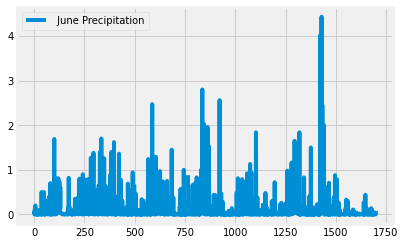

In [26]:
#1c. Use Pandas Plotting with Matplotlib to plot the data
june_prcp_df.plot()
june_prcp_df.describe()

In [22]:
#2a. December precipitation query 
dec_prcp = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date) == 12).order_by(Measurement.date.desc()).all()
print(dec_prcp)

[('2016-12-31', 0.01), ('2016-12-31', 0.62), ('2016-12-31', 0.36), ('2016-12-31', 0.25), ('2016-12-31', 0.9), ('2016-12-30', 0.12), ('2016-12-30', 0.21), ('2016-12-30', 0.29), ('2016-12-30', None), ('2016-12-30', 0.07), ('2016-12-30', 0.29), ('2016-12-30', 2.37), ('2016-12-29', 0.04), ('2016-12-29', 0.18), ('2016-12-29', 0.56), ('2016-12-29', None), ('2016-12-29', 0.05), ('2016-12-29', 0.52), ('2016-12-29', 1.03), ('2016-12-28', 0.02), ('2016-12-28', 0.09), ('2016-12-28', 0.01), ('2016-12-28', None), ('2016-12-28', 0.06), ('2016-12-28', 0.09), ('2016-12-28', 0.14), ('2016-12-27', 0.0), ('2016-12-27', 0.03), ('2016-12-27', 0.02), ('2016-12-27', 0.0), ('2016-12-27', 0.05), ('2016-12-27', 0.14), ('2016-12-26', 0.02), ('2016-12-26', 0.26), ('2016-12-26', None), ('2016-12-26', 0.06), ('2016-12-26', 0.22), ('2016-12-26', 1.48), ('2016-12-25', 0.0), ('2016-12-25', 0.03), ('2016-12-25', 0.0), ('2016-12-25', 0.02), ('2016-12-25', 0.38), ('2016-12-24', 0.01), ('2016-12-24', 0.14), ('2016-12-24',

In [27]:
#2b. December precipitation dataframe 
dec_prcp_df = pd.DataFrame(dec_prcp, columns=['Date', 'December Precipitation'])
print(dec_prcp_df.to_string(index=False))

      Date  December Precipitation
2016-12-31                    0.01
2016-12-31                    0.62
2016-12-31                    0.36
2016-12-31                    0.25
2016-12-31                    0.90
2016-12-30                    0.12
2016-12-30                    0.21
2016-12-30                    0.29
2016-12-30                     NaN
2016-12-30                    0.07
2016-12-30                    0.29
2016-12-30                    2.37
2016-12-29                    0.04
2016-12-29                    0.18
2016-12-29                    0.56
2016-12-29                     NaN
2016-12-29                    0.05
2016-12-29                    0.52
2016-12-29                    1.03
2016-12-28                    0.02
2016-12-28                    0.09
2016-12-28                    0.01
2016-12-28                     NaN
2016-12-28                    0.06
2016-12-28                    0.09
2016-12-28                    0.14
2016-12-27                    0.00
2016-12-27          

,December Precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


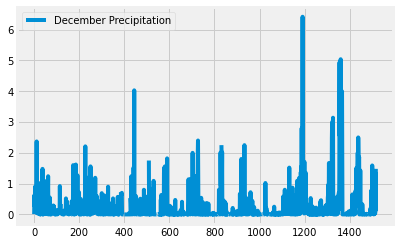

In [28]:
#1c. Use Pandas Plotting with Matplotlib to plot the data
dec_prcp_df.plot()
dec_prcp_df.describe()